## Obectives

1. LR, SVM, MNB with Gridsearch selected parameters
2. Features BOW,TFIDF,w2v
3. Can easily add new feature or model by creating new function


## TODO

1. Bagging model, Boosting model
2. Word embedding
3. Gridsearch again for ngrams for char 
4. explore more paremeter for countvectorizer and TFIDF

## Set up Neptune for logging

In [2]:
import neptune
from neptunecontrib.monitoring.metrics import expand_prediction, log_class_metrics, log_binary_classification_metrics, log_classification_report,log_confusion_matrix,log_prediction_distribution
from neptunecontrib.api import log_table
import os
from dotenv import load_dotenv

load_dotenv()
NEPTUNE_PROJECT= os.getenv('NEPTUNE_PROJECT')
NEPTUNE_API_TOKEN = os.getenv(('NEPTUNE_API_TOKEN'))
neptune.init(project_qualified_name= NEPTUNE_PROJECT,api_token=NEPTUNE_API_TOKEN) 
             

Project(codekcg23/Research-Experiments)

## Load necessary modules

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
#from sklearn.metrics import accuracy_score, f1_score, precision_score,roc_curve,roc_auc_score,confusion_matrix,recall_score
from sklearn.pipeline import Pipeline
import re
import gensim

# import helper function script
import sys
sys.path.insert(1,'G:\\Github\\Sinhala-Hate-Speech-Detection')
import utills

In [4]:
# load datasets
path = '../Datasets/processed/preprocessed/'
df_A = pd.read_csv(path+'df_A.csv')    
df_B = pd.read_csv(path+'df_B.csv')    # fb dataset -kaggle 
df_A_B = pd.read_csv(path+'df_A_B.csv') 


In [5]:
## Remove NaN instances after preprocessed and save it again new folder
#print(df_A.iloc[610])
df_A.drop(index =[610,3070],inplace=True)

#print(df_B.iloc[14:20])

df_B.drop(index =[16,19],inplace=True)
# df_B had two roads including english words

In [7]:
nan_values = df_A_B[df_A_B['cleaned'].isna()]
print (nan_values)
df_A_B.drop(index =[610,3070,6484,6487],inplace=True)

      comment  label df cleaned
610        <>      0  A     NaN
3070      <3,      0  A     NaN
6484  Hkzz...      0  B     NaN
6487     ROX       0  B     NaN


In [8]:
from gensim.models import word2vec
model_skipgram = word2vec.Word2Vec.load("G:/Github/Sinhala-Hate-Speech-Detection/Embedding_models/word2vec/word2vec_300.w2v")
model_cbow = word2vec.Word2Vec.load("G:/Github/Sinhala-Hate-Speech-Detection/Embedding_models/CBOW-word2vec/cbow_300.w2v")

In [9]:
# word_embedding


def word2vec_skipgram_embedding(X_train,X_test):
    # initialize model
    # TODo initialize word2vec model here for partucular dataset
    X_train_embeddings = utills.get_embedding(X_train,model_skipgram.wv)
    X_test_embeddings = utills.get_embedding(X_test,model_skipgram.wv)
    return X_train_embeddings,X_test_embeddings
def word2vec_cbow_embedding(X_train,X_test):
    # initialize model
    
    # TODo initialize word2vec model here for partucular dataset
    X_train_embeddings = utills.get_embedding(X_train,model_cbow.wv)
    X_test_embeddings = utills.get_embedding(X_test,model_cbow.wv)
    return X_train_embeddings,X_test_embeddings

def NB(X_train, X_test, Y_train):
    from sklearn.naive_bayes import GaussianNB
    nb = GaussianNB()
    nb = nb.fit(X_train.toarray(), Y_train)
    Y_pred = nb.predict(X_test.toarray())
    #Y_prob = nb.predict_proba(X_test.toarray())[:, 1]
    return Y_pred

## BOW vs word2vec CBOW on NB
There are two different format of input of NB so convwerted sparse matrix to array

df_A+W2V CBOW+NB
              precision    recall  f1-score   support

           0       0.80      0.38      0.52      1336
           1       0.37      0.79      0.50       604

    accuracy                           0.51      1940
   macro avg       0.58      0.59      0.51      1940
weighted avg       0.67      0.51      0.51      1940



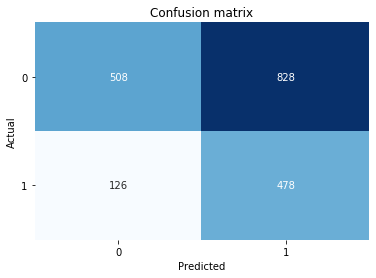

========= Eperiment -  df_A+W2V CBOW+NB  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-297
 ====  W2V CBOW  ==== 


Accuracy  F1-score    Recall  Precision       AUC
NB  0.508247  0.500524  0.791391   0.366003  0.585815

 ====  df_A  ==== 


Accuracy  F1-score    Recall  Precision       AUC
NB+W2V CBOW  0.508247  0.500524  0.791391   0.366003  0.585815

Accuracy  F1-score    Recall  Precision       AUC
df_A+W2V CBOW+NB  0.508247  0.500524  0.791391   0.366003  0.585815

In [40]:
classifier_feature({'df_A':df_A},{'NB':utills.NB},{'W2V CBOW':word2vec_cbow_embedding},'Traditional Features with ML algo Final ')

df_A+bow_word+NB
              precision    recall  f1-score   support

           0       0.80      0.59      0.68      1336
           1       0.42      0.67      0.52       604

    accuracy                           0.61      1940
   macro avg       0.61      0.63      0.60      1940
weighted avg       0.68      0.61      0.63      1940



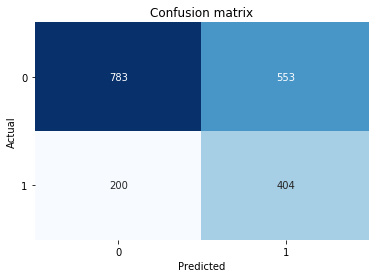

========= Eperiment -  df_A+bow_word+NB  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-296
 ====  bow_word  ==== 


Accuracy  F1-score    Recall  Precision       AUC
NB  0.611856  0.517617  0.668874   0.422153  0.627476

 ====  df_A  ==== 


Accuracy  F1-score    Recall  Precision       AUC
NB+bow_word  0.611856  0.517617  0.668874   0.422153  0.627476

Accuracy  F1-score    Recall  Precision       AUC
df_A+bow_word+NB  0.611856  0.517617  0.668874   0.422153  0.627476

In [39]:
classifier_feature({'df_A':df_A},{'NB':NB},{"bow_word":utills.bow_word},'Traditional Features with ML algo Final ')

In [13]:
# load datasets
df_dict = {'df_A': df_A,'df_B': df_B,'df_A_B' :df_A_B}
# feature dict
feature_dict={"bow_word":utills.bow_word,"bow_char":bow_char,"tfidf_word":utills.tfidf_word,"tfidf_char":tfidf_char}
# model dict
model_dict = {"LR":utills.lr,"SVM_linear":utills.svc_linear,"SVM_rbf":utills.svc_rbf,"NB":NB,'RF':utills.RF}

## ML algorithm and features of df_A,df_B 

df_A+bow_word+LR
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1336
           1       0.78      0.63      0.70       604

    accuracy                           0.83      1940
   macro avg       0.81      0.78      0.79      1940
weighted avg       0.83      0.83      0.83      1940



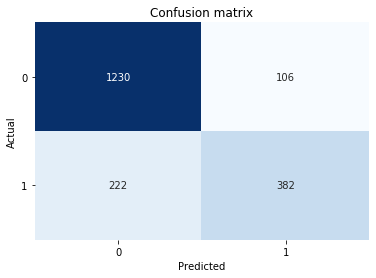

========= Eperiment -  df_A+bow_word+LR  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-309
df_A+bow_word+SVM_linear
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1336
           1       0.72      0.68      0.70       604

    accuracy                           0.82      1940
   macro avg       0.79      0.78      0.78      1940
weighted avg       0.81      0.82      0.82      1940



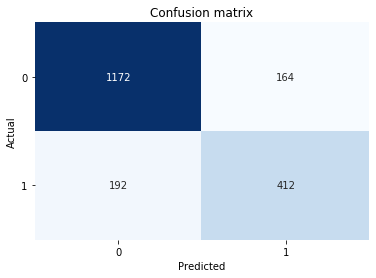

========= Eperiment -  df_A+bow_word+SVM_linear  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-310
df_A+bow_word+SVM_rbf
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      1336
           1       0.88      0.44      0.58       604

    accuracy                           0.81      1940
   macro avg       0.84      0.70      0.73      1940
weighted avg       0.82      0.81      0.78      1940



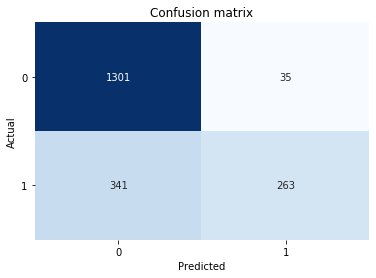

========= Eperiment -  df_A+bow_word+SVM_rbf  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-311
df_A+bow_word+NB
              precision    recall  f1-score   support

           0       0.80      0.59      0.68      1336
           1       0.42      0.67      0.52       604

    accuracy                           0.61      1940
   macro avg       0.61      0.63      0.60      1940
weighted avg       0.68      0.61      0.63      1940



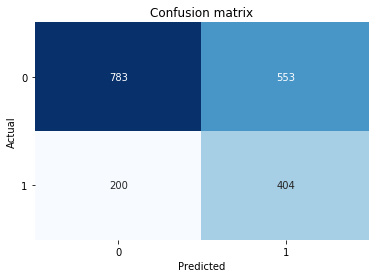

========= Eperiment -  df_A+bow_word+NB  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-312
df_A+bow_word+RF
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      1336
           1       0.84      0.58      0.69       604

    accuracy                           0.84      1940
   macro avg       0.84      0.77      0.79      1940
weighted avg       0.84      0.84      0.83      1940



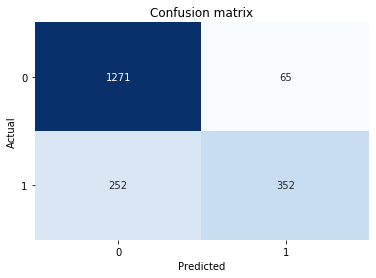

========= Eperiment -  df_A+bow_word+RF  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-313
 ====  bow_word  ==== 


Accuracy  F1-score    Recall  Precision       AUC
LR          0.830928  0.699634  0.632450   0.782787  0.776555
SVM_linear  0.816495  0.698305  0.682119   0.715278  0.779682
SVM_rbf     0.806186  0.583149  0.435430   0.882550  0.704616
NB          0.611856  0.517617  0.668874   0.422153  0.627476
RF          0.836598  0.689520  0.582781   0.844125  0.767064

df_A+bow_char+LR
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1336
           1       0.79      0.69      0.74       604

    accuracy                           0.85      1940
   macro avg       0.83      0.80      0.81      1940
weighted avg       0.84      0.85      0.84      1940



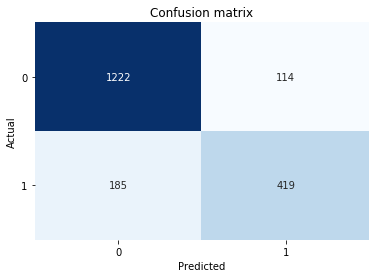

========= Eperiment -  df_A+bow_char+LR  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-314
df_A+bow_char+SVM_linear
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1336
           1       0.72      0.70      0.71       604

    accuracy                           0.82      1940
   macro avg       0.79      0.79      0.79      1940
weighted avg       0.82      0.82      0.82      1940



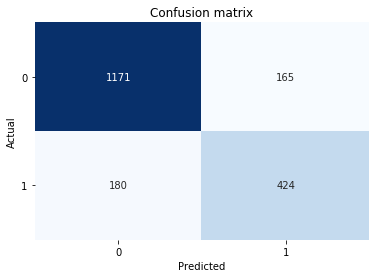

========= Eperiment -  df_A+bow_char+SVM_linear  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-315
df_A+bow_char+SVM_rbf
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      1336
           1       0.93      0.43      0.59       604

    accuracy                           0.81      1940
   macro avg       0.86      0.71      0.73      1940
weighted avg       0.84      0.81      0.79      1940



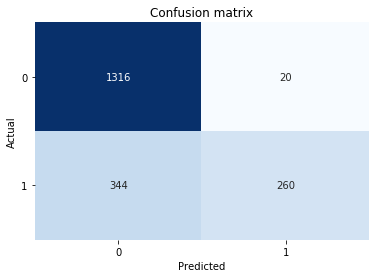

========= Eperiment -  df_A+bow_char+SVM_rbf  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-316
df_A+bow_char+NB
              precision    recall  f1-score   support

           0       0.76      0.80      0.78      1336
           1       0.50      0.43      0.46       604

    accuracy                           0.69      1940
   macro avg       0.63      0.62      0.62      1940
weighted avg       0.68      0.69      0.68      1940



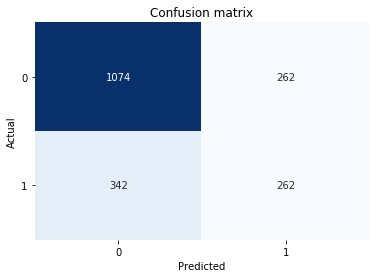

========= Eperiment -  df_A+bow_char+NB  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-317
df_A+bow_char+RF
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1336
           1       0.86      0.63      0.73       604

    accuracy                           0.85      1940
   macro avg       0.86      0.79      0.81      1940
weighted avg       0.85      0.85      0.85      1940



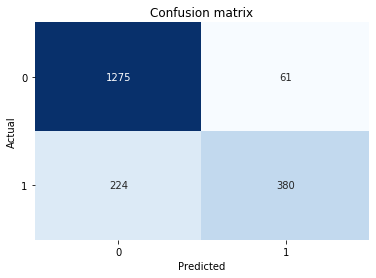

========= Eperiment -  df_A+bow_char+RF  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-318
 ====  bow_char  ==== 


Accuracy  F1-score    Recall  Precision       AUC
LR          0.845876  0.737027  0.693709   0.786116  0.804190
SVM_linear  0.822165  0.710813  0.701987   0.719864  0.789242
SVM_rbf     0.812371  0.588235  0.430464   0.928571  0.707747
NB          0.688660  0.464539  0.433775   0.500000  0.618834
RF          0.853093  0.727273  0.629139   0.861678  0.791740

df_A+tfidf_word+LR
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1336
           1       0.87      0.47      0.61       604

    accuracy                           0.81      1940
   macro avg       0.84      0.72      0.74      1940
weighted avg       0.82      0.81      0.79      1940



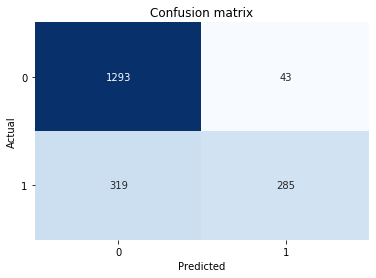

========= Eperiment -  df_A+tfidf_word+LR  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-319
df_A+tfidf_word+SVM_linear
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1336
           1       0.80      0.64      0.71       604

    accuracy                           0.84      1940
   macro avg       0.82      0.78      0.80      1940
weighted avg       0.83      0.84      0.83      1940



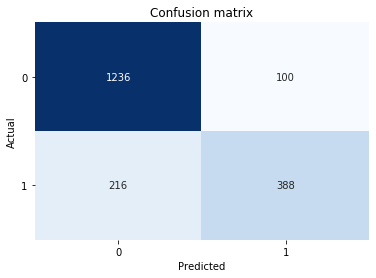

========= Eperiment -  df_A+tfidf_word+SVM_linear  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-320
df_A+tfidf_word+SVM_rbf
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1336
           1       0.88      0.48      0.62       604

    accuracy                           0.82      1940
   macro avg       0.84      0.73      0.75      1940
weighted avg       0.83      0.82      0.80      1940



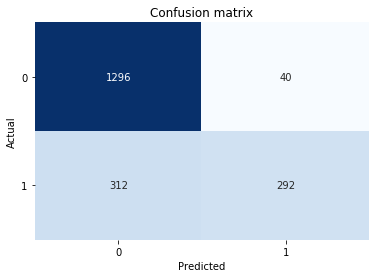

========= Eperiment -  df_A+tfidf_word+SVM_rbf  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-321
df_A+tfidf_word+NB
              precision    recall  f1-score   support

           0       0.77      0.59      0.67      1336
           1       0.40      0.60      0.48       604

    accuracy                           0.60      1940
   macro avg       0.58      0.60      0.58      1940
weighted avg       0.65      0.60      0.61      1940



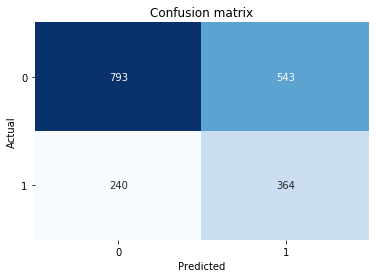

========= Eperiment -  df_A+tfidf_word+NB  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-322
df_A+tfidf_word+RF
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1336
           1       0.87      0.56      0.68       604

    accuracy                           0.84      1940
   macro avg       0.85      0.76      0.79      1940
weighted avg       0.84      0.84      0.83      1940



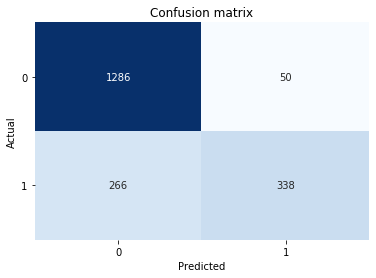

========= Eperiment -  df_A+tfidf_word+RF  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-323
 ====  tfidf_word  ==== 


Accuracy  F1-score    Recall  Precision       AUC
LR          0.813402  0.611588  0.471854   0.868902  0.719834
SVM_linear  0.837113  0.710623  0.642384   0.795082  0.783767
SVM_rbf     0.818557  0.623932  0.483444   0.879518  0.726752
NB          0.596392  0.481800  0.602649   0.401323  0.598106
RF          0.837113  0.681452  0.559603   0.871134  0.761089

df_A+tfidf_char+LR
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1336
           1       0.93      0.48      0.63       604

    accuracy                           0.82      1940
   macro avg       0.87      0.73      0.76      1940
weighted avg       0.84      0.82      0.81      1940



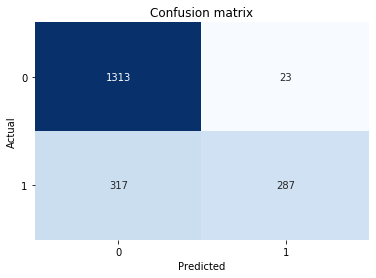

========= Eperiment -  df_A+tfidf_char+LR  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-324
df_A+tfidf_char+SVM_linear
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1336
           1       0.86      0.64      0.73       604

    accuracy                           0.86      1940
   macro avg       0.86      0.80      0.82      1940
weighted avg       0.86      0.86      0.85      1940



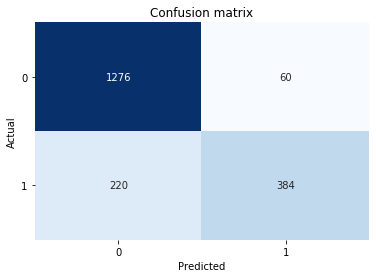

========= Eperiment -  df_A+tfidf_char+SVM_linear  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-325
df_A+tfidf_char+SVM_rbf
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1336
           1       0.92      0.49      0.64       604

    accuracy                           0.83      1940
   macro avg       0.86      0.73      0.76      1940
weighted avg       0.84      0.83      0.81      1940



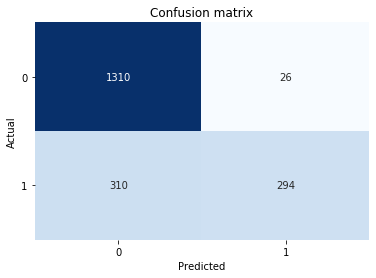

========= Eperiment -  df_A+tfidf_char+SVM_rbf  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-326
df_A+tfidf_char+NB
              precision    recall  f1-score   support

           0       0.75      0.81      0.78      1336
           1       0.48      0.40      0.44       604

    accuracy                           0.68      1940
   macro avg       0.62      0.60      0.61      1940
weighted avg       0.67      0.68      0.67      1940



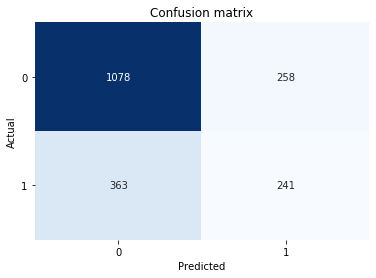

========= Eperiment -  df_A+tfidf_char+NB  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-327
df_A+tfidf_char+RF
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1336
           1       0.89      0.60      0.72       604

    accuracy                           0.85      1940
   macro avg       0.87      0.78      0.81      1940
weighted avg       0.86      0.85      0.84      1940



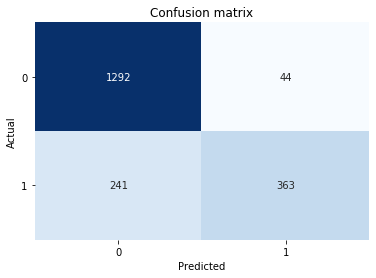

========= Eperiment -  df_A+tfidf_char+RF  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-328
 ====  tfidf_char  ==== 


Accuracy  F1-score    Recall  Precision       AUC
LR          0.824742  0.628009  0.475166   0.925806  0.728975
SVM_linear  0.855670  0.732824  0.635762   0.864865  0.795426
SVM_rbf     0.826804  0.636364  0.486755   0.918750  0.733647
NB          0.679897  0.436990  0.399007   0.482966  0.602946
RF          0.853093  0.718101  0.600993   0.891892  0.784030

 ====  df_A  ==== 


Accuracy  F1-score    Recall  Precision       AUC
LR+bow_word            0.830928  0.699634  0.632450   0.782787  0.776555
SVM_linear+bow_word    0.816495  0.698305  0.682119   0.715278  0.779682
SVM_rbf+bow_word       0.806186  0.583149  0.435430   0.882550  0.704616
NB+bow_word            0.611856  0.517617  0.668874   0.422153  0.627476
RF+bow_word            0.836598  0.689520  0.582781   0.844125  0.767064
LR+bow_char            0.845876  0.737027  0.693709   0.786116  0.804190
SVM_linear+bow_char    0.822165  0.710813  0.701987   0.719864  0.789242
SVM_rbf+bow_char       0.812371  0.588235  0.430464   0.928571  0.707747
NB+bow_char            0.688660  0.464539  0.433775   0.500000  0.618834
RF+bow_char            0.853093  0.727273  0.629139   0.861678  0.791740
LR+tfidf_word          0.813402  0.611588  0.471854   0.868902  0.719834
SVM_linear+tfidf_word  0.837113  0.710623  0.642384   0.795082  0.783767
SVM_rbf+tfidf_word     0.818557  0.623932  0.483444   0.879518  0.726752
NB+tfidf_word          0.596392  0.481800  0.602649   0.401323  0.598106
RF+tfidf_word          0.837113  0.681452  0.559603   0.871134  0.761089
LR+tfidf_char          0.824742  0.628009  0.475166   0.925806  0.728975
SVM_linear+tfidf_char  0.855670  0.732824  0.635762   0.864865  0.795426
SVM_rbf+tfidf_char     0.826804  0.636364  0.486755   0.918750  0.733647
NB+tfidf_char          0.679897  0.436990  0.399007   0.482966  0.602946
RF+tfidf_char          0.853093  0.718101  0.600993   0.891892  0.784030

df_B+bow_word+LR
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       866
           1       0.90      0.83      0.86      1037

    accuracy                           0.85      1903
   macro avg       0.85      0.86      0.85      1903
weighted avg       0.86      0.85      0.85      1903



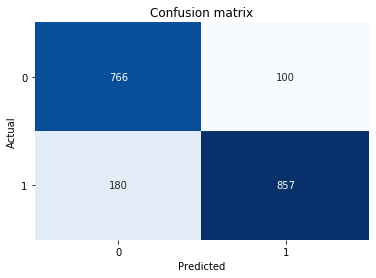

========= Eperiment -  df_B+bow_word+LR  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-329
df_B+bow_word+SVM_linear
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       866
           1       0.89      0.81      0.85      1037

    accuracy                           0.84      1903
   macro avg       0.84      0.84      0.84      1903
weighted avg       0.84      0.84      0.84      1903



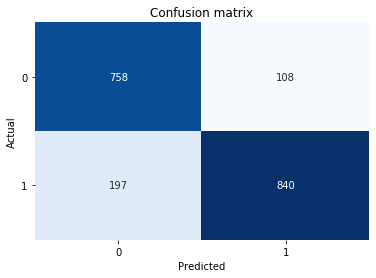

========= Eperiment -  df_B+bow_word+SVM_linear  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-330
df_B+bow_word+SVM_rbf
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       866
           1       0.86      0.79      0.82      1037

    accuracy                           0.82      1903
   macro avg       0.82      0.82      0.82      1903
weighted avg       0.82      0.82      0.82      1903



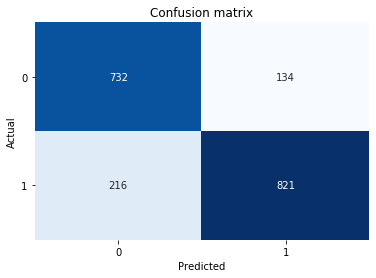

========= Eperiment -  df_B+bow_word+SVM_rbf  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-331
df_B+bow_word+NB
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       866
           1       0.88      0.78      0.83      1037

    accuracy                           0.82      1903
   macro avg       0.83      0.83      0.82      1903
weighted avg       0.83      0.82      0.82      1903



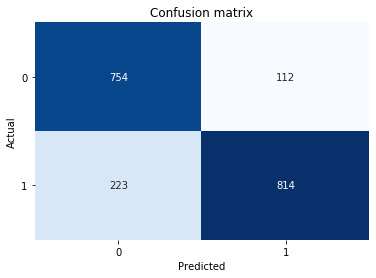

========= Eperiment -  df_B+bow_word+NB  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-332
df_B+bow_word+RF
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       866
           1       0.89      0.78      0.83      1037

    accuracy                           0.83      1903
   macro avg       0.83      0.83      0.83      1903
weighted avg       0.83      0.83      0.83      1903



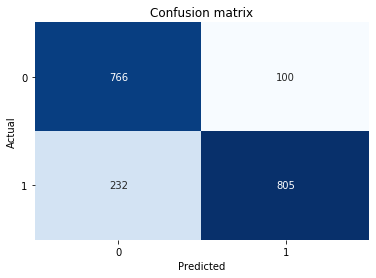

========= Eperiment -  df_B+bow_word+RF  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-333
 ====  bow_word  ==== 


Accuracy  F1-score    Recall  Precision       AUC
LR          0.852864  0.859579  0.826422   0.895507  0.855474
SVM_linear  0.839727  0.846348  0.810029   0.886076  0.842659
SVM_rbf     0.816080  0.824297  0.791707   0.859686  0.818486
NB          0.823962  0.829343  0.784957   0.879050  0.827813
RF          0.825539  0.829042  0.776278   0.889503  0.830402

df_B+bow_char+LR
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       866
           1       0.89      0.86      0.87      1037

    accuracy                           0.86      1903
   macro avg       0.86      0.86      0.86      1903
weighted avg       0.87      0.86      0.86      1903



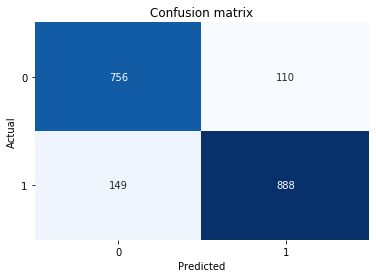

========= Eperiment -  df_B+bow_char+LR  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-334
df_B+bow_char+SVM_linear
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       866
           1       0.88      0.85      0.86      1037

    accuracy                           0.85      1903
   macro avg       0.85      0.85      0.85      1903
weighted avg       0.85      0.85      0.85      1903



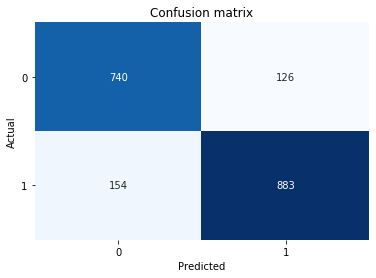

========= Eperiment -  df_B+bow_char+SVM_linear  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-335
df_B+bow_char+SVM_rbf
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       866
           1       0.86      0.82      0.84      1037

    accuracy                           0.83      1903
   macro avg       0.83      0.83      0.83      1903
weighted avg       0.83      0.83      0.83      1903



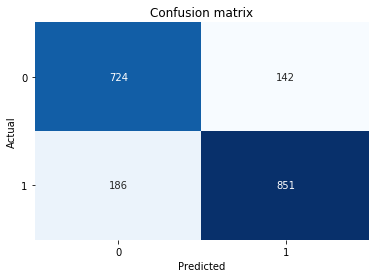

========= Eperiment -  df_B+bow_char+SVM_rbf  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-336
df_B+bow_char+NB
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       866
           1       0.82      0.86      0.84      1037

    accuracy                           0.82      1903
   macro avg       0.82      0.82      0.82      1903
weighted avg       0.82      0.82      0.82      1903



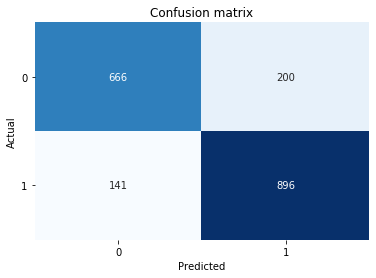

========= Eperiment -  df_B+bow_char+NB  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-337


Unexpected error in ping thread.
Traceback (most recent call last):
  File "C:\Users\Kavishka\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 672, in urlopen
    chunked=chunked,
  File "C:\Users\Kavishka\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 421, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\Kavishka\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 416, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\Kavishka\anaconda3\lib\http\client.py", line 1344, in getresponse
    response.begin()
  File "C:\Users\Kavishka\anaconda3\lib\http\client.py", line 306, in begin
    version, status, reason = self._read_status()
  File "C:\Users\Kavishka\anaconda3\lib\http\client.py", line 275, in _read_status
    raise RemoteDisconnected("Remote end closed connection without"
http.client.RemoteDisconnected: Remote end closed connection without response

During handling of 

df_B+bow_char+RF
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       866
           1       0.87      0.88      0.87      1037

    accuracy                           0.86      1903
   macro avg       0.86      0.86      0.86      1903
weighted avg       0.86      0.86      0.86      1903



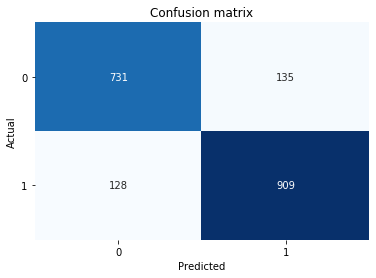

========= Eperiment -  df_B+bow_char+RF  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-338
 ====  bow_char  ==== 


Accuracy  F1-score    Recall  Precision       AUC
LR          0.863899  0.872727  0.856316   0.889780  0.864648
SVM_linear  0.852864  0.863148  0.851495   0.875124  0.852999
SVM_rbf     0.827641  0.838424  0.820636   0.856999  0.828332
NB          0.820809  0.840131  0.864031   0.817518  0.816542
RF          0.861797  0.873618  0.876567   0.870690  0.860339

df_B+tfidf_word+LR
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       866
           1       0.86      0.87      0.86      1037

    accuracy                           0.85      1903
   macro avg       0.85      0.85      0.85      1903
weighted avg       0.85      0.85      0.85      1903



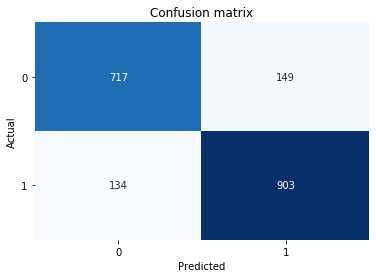

========= Eperiment -  df_B+tfidf_word+LR  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-339
df_B+tfidf_word+SVM_linear
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       866
           1       0.86      0.86      0.86      1037

    accuracy                           0.85      1903
   macro avg       0.85      0.85      0.85      1903
weighted avg       0.85      0.85      0.85      1903



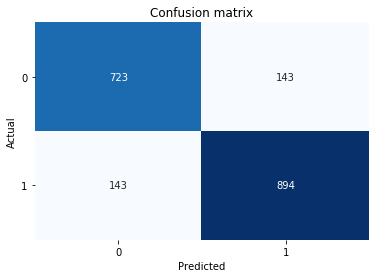

========= Eperiment -  df_B+tfidf_word+SVM_linear  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-340
df_B+tfidf_word+SVM_rbf
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       866
           1       0.86      0.87      0.87      1037

    accuracy                           0.85      1903
   macro avg       0.85      0.85      0.85      1903
weighted avg       0.85      0.85      0.85      1903



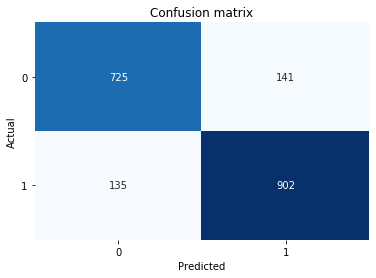

========= Eperiment -  df_B+tfidf_word+SVM_rbf  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-341
df_B+tfidf_word+NB
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       866
           1       0.85      0.80      0.83      1037

    accuracy                           0.82      1903
   macro avg       0.81      0.82      0.81      1903
weighted avg       0.82      0.82      0.82      1903



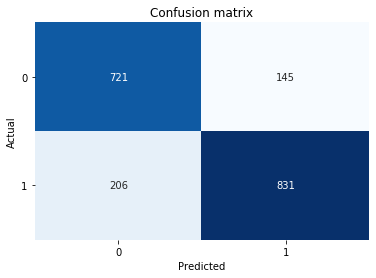

========= Eperiment -  df_B+tfidf_word+NB  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-342
df_B+tfidf_word+RF
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       866
           1       0.89      0.78      0.83      1037

    accuracy                           0.83      1903
   macro avg       0.83      0.84      0.83      1903
weighted avg       0.84      0.83      0.83      1903



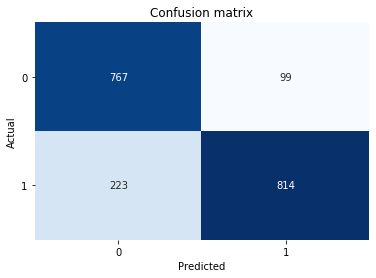

========= Eperiment -  df_B+tfidf_word+RF  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-343
 ====  tfidf_word  ==== 


Accuracy  F1-score    Recall  Precision       AUC
LR          0.851287  0.864528  0.870781   0.858365  0.849363
SVM_linear  0.849711  0.862102  0.862102   0.862102  0.848488
SVM_rbf     0.854966  0.867308  0.869817   0.864813  0.853500
NB          0.815554  0.825633  0.801350   0.851434  0.816957
RF          0.830793  0.834872  0.784957   0.891566  0.835319

df_B+tfidf_char+LR
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       866
           1       0.88      0.88      0.88      1037

    accuracy                           0.87      1903
   macro avg       0.87      0.87      0.87      1903
weighted avg       0.87      0.87      0.87      1903



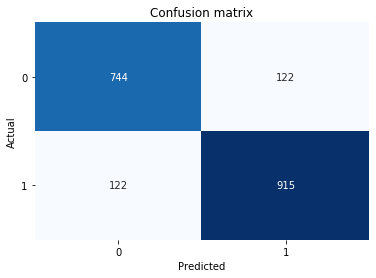

========= Eperiment -  df_B+tfidf_char+LR  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-344
df_B+tfidf_char+SVM_linear
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       866
           1       0.88      0.89      0.89      1037

    accuracy                           0.88      1903
   macro avg       0.88      0.87      0.87      1903
weighted avg       0.88      0.88      0.88      1903



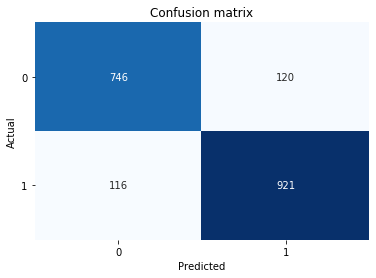

========= Eperiment -  df_B+tfidf_char+SVM_linear  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-345
df_B+tfidf_char+SVM_rbf
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       866
           1       0.89      0.89      0.89      1037

    accuracy                           0.88      1903
   macro avg       0.88      0.88      0.88      1903
weighted avg       0.88      0.88      0.88      1903



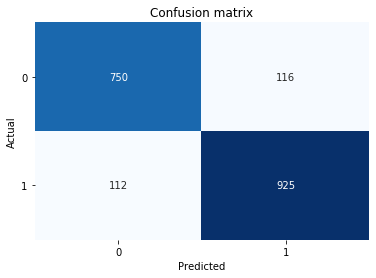

========= Eperiment -  df_B+tfidf_char+SVM_rbf  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-346
df_B+tfidf_char+NB
              precision    recall  f1-score   support

           0       0.83      0.73      0.78       866
           1       0.80      0.88      0.83      1037

    accuracy                           0.81      1903
   macro avg       0.81      0.80      0.81      1903
weighted avg       0.81      0.81      0.81      1903



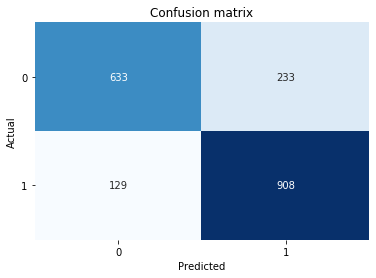

========= Eperiment -  df_B+tfidf_char+NB  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-347
df_B+tfidf_char+RF
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       866
           1       0.87      0.87      0.87      1037

    accuracy                           0.86      1903
   macro avg       0.86      0.86      0.86      1903
weighted avg       0.86      0.86      0.86      1903



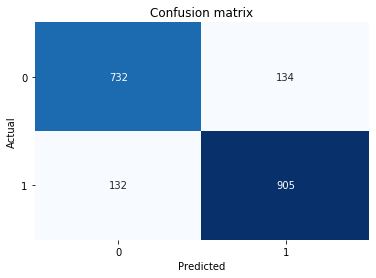

========= Eperiment -  df_B+tfidf_char+RF  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-348
 ====  tfidf_char  ==== 


Accuracy  F1-score    Recall  Precision       AUC
LR          0.871781  0.882353  0.882353   0.882353  0.870738
SVM_linear  0.875985  0.886429  0.888139   0.884726  0.874785
SVM_rbf     0.880189  0.890279  0.891996   0.888569  0.879023
NB          0.809774  0.833792  0.875603   0.795793  0.803275
RF          0.860221  0.871869  0.872710   0.871030  0.858988

 ====  df_B  ==== 


Accuracy  F1-score    Recall  Precision       AUC
LR+bow_word            0.852864  0.859579  0.826422   0.895507  0.855474
SVM_linear+bow_word    0.839727  0.846348  0.810029   0.886076  0.842659
SVM_rbf+bow_word       0.816080  0.824297  0.791707   0.859686  0.818486
NB+bow_word            0.823962  0.829343  0.784957   0.879050  0.827813
RF+bow_word            0.825539  0.829042  0.776278   0.889503  0.830402
LR+bow_char            0.863899  0.872727  0.856316   0.889780  0.864648
SVM_linear+bow_char    0.852864  0.863148  0.851495   0.875124  0.852999
SVM_rbf+bow_char       0.827641  0.838424  0.820636   0.856999  0.828332
NB+bow_char            0.820809  0.840131  0.864031   0.817518  0.816542
RF+bow_char            0.861797  0.873618  0.876567   0.870690  0.860339
LR+tfidf_word          0.851287  0.864528  0.870781   0.858365  0.849363
SVM_linear+tfidf_word  0.849711  0.862102  0.862102   0.862102  0.848488
SVM_rbf+tfidf_word     0.854966  0.867308  0.869817   0.864813  0.853500
NB+tfidf_word          0.815554  0.825633  0.801350   0.851434  0.816957
RF+tfidf_word          0.830793  0.834872  0.784957   0.891566  0.835319
LR+tfidf_char          0.871781  0.882353  0.882353   0.882353  0.870738
SVM_linear+tfidf_char  0.875985  0.886429  0.888139   0.884726  0.874785
SVM_rbf+tfidf_char     0.880189  0.890279  0.891996   0.888569  0.879023
NB+tfidf_char          0.809774  0.833792  0.875603   0.795793  0.803275
RF+tfidf_char          0.860221  0.871869  0.872710   0.871030  0.858988

ValueError: np.nan is an invalid document, expected byte or unicode string.

Unexpected error in ping thread.
Traceback (most recent call last):
  File "C:\Users\Kavishka\anaconda3\lib\site-packages\neptune\internal\threads\ping_thread.py", line 37, in run
    self.__backend.ping_experiment(self.__experiment)
  File "C:\Users\Kavishka\anaconda3\lib\site-packages\neptune\internal\api_clients\hosted_api_clients\hosted_alpha_leaderboard_api_client.py", line 392, in ping_experiment
    self.leaderboard_swagger_client.api.ping(experimentId=str(experiment.internal_id)).response().result
  File "C:\Users\Kavishka\anaconda3\lib\site-packages\bravado\http_future.py", line 239, in response
    six.reraise(*sys.exc_info())
  File "C:\Users\Kavishka\anaconda3\lib\site-packages\six.py", line 703, in reraise
    raise value
  File "C:\Users\Kavishka\anaconda3\lib\site-packages\bravado\http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "C:\Users\Kavishka\anaconda3\lib\site-packages\bravado\http_future.py", line 124, 

In [48]:
classifier_feature(df_dict,model_dict,feature_dict,'Traditional Features with ML algo Final ')

## ML algorithms and features for df_A_B

df_A_B+bow_word+LR
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      2203
           1       0.85      0.72      0.78      1640

    accuracy                           0.83      3843
   macro avg       0.84      0.82      0.82      3843
weighted avg       0.83      0.83      0.83      3843



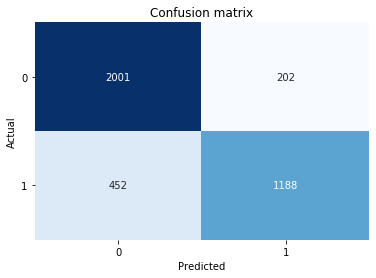

========= Eperiment -  df_A_B+bow_word+LR  =========


Info (NVML): NVML Shared Library Not Found. GPU usage metrics may not be reported. For more information, see https://docs-legacy.neptune.ai/logging-and-managing-experiment-results/logging-experiment-data.html#hardware-consumption 


https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-349
df_A_B+bow_word+SVM_linear
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      2203
           1       0.82      0.74      0.78      1640

    accuracy                           0.82      3843
   macro avg       0.82      0.81      0.81      3843
weighted avg       0.82      0.82      0.82      3843



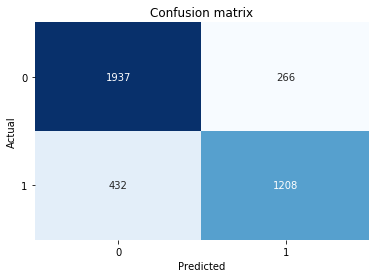

========= Eperiment -  df_A_B+bow_word+SVM_linear  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-350
df_A_B+bow_word+SVM_rbf
              precision    recall  f1-score   support

           0       0.78      0.95      0.86      2203
           1       0.90      0.64      0.75      1640

    accuracy                           0.82      3843
   macro avg       0.84      0.80      0.80      3843
weighted avg       0.83      0.82      0.81      3843



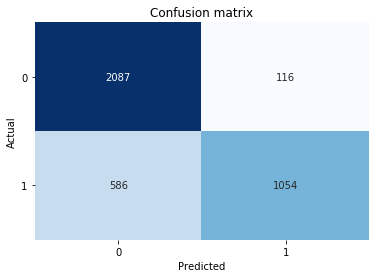

========= Eperiment -  df_A_B+bow_word+SVM_rbf  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-351
df_A_B+bow_word+NB
              precision    recall  f1-score   support

           0       0.81      0.49      0.61      2203
           1       0.55      0.85      0.67      1640

    accuracy                           0.64      3843
   macro avg       0.68      0.67      0.64      3843
weighted avg       0.70      0.64      0.64      3843



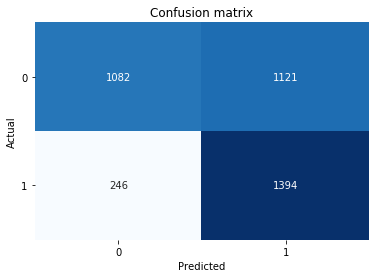

========= Eperiment -  df_A_B+bow_word+NB  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-352
df_A_B+bow_word+RF
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      2203
           1       0.85      0.72      0.78      1640

    accuracy                           0.83      3843
   macro avg       0.83      0.81      0.82      3843
weighted avg       0.83      0.83      0.82      3843



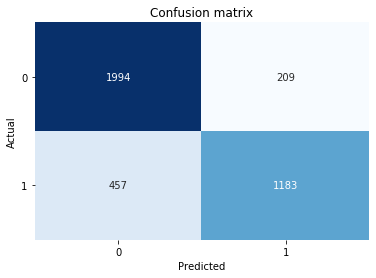

========= Eperiment -  df_A_B+bow_word+RF  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-353
 ====  bow_word  ==== 


Accuracy  F1-score    Recall  Precision       AUC
LR          0.829820  0.784158  0.724390   0.854676  0.816349
SVM_linear  0.818371  0.775851  0.736585   0.819539  0.807920
SVM_rbf     0.817330  0.750178  0.642683   0.900855  0.795014
NB          0.644288  0.670999  0.850000   0.554274  0.670574
RF          0.826698  0.780343  0.721341   0.849856  0.813235

df_A_B+bow_char+LR
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      2203
           1       0.84      0.76      0.80      1640

    accuracy                           0.84      3843
   macro avg       0.84      0.83      0.83      3843
weighted avg       0.84      0.84      0.83      3843



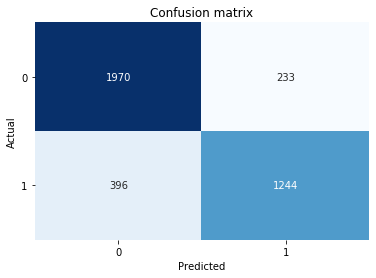

========= Eperiment -  df_A_B+bow_char+LR  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-354
df_A_B+bow_char+SVM_linear
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      2203
           1       0.80      0.75      0.77      1640

    accuracy                           0.81      3843
   macro avg       0.81      0.80      0.81      3843
weighted avg       0.81      0.81      0.81      3843



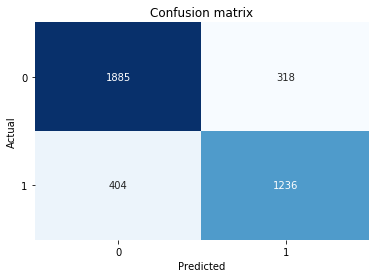

========= Eperiment -  df_A_B+bow_char+SVM_linear  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-355
df_A_B+bow_char+SVM_rbf
              precision    recall  f1-score   support

           0       0.78      0.95      0.86      2203
           1       0.90      0.63      0.75      1640

    accuracy                           0.82      3843
   macro avg       0.84      0.79      0.80      3843
weighted avg       0.83      0.82      0.81      3843



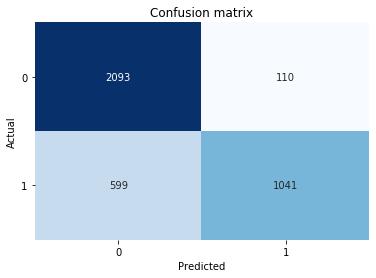

========= Eperiment -  df_A_B+bow_char+SVM_rbf  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-356
df_A_B+bow_char+NB
              precision    recall  f1-score   support

           0       0.77      0.63      0.70      2203
           1       0.60      0.75      0.67      1640

    accuracy                           0.68      3843
   macro avg       0.69      0.69      0.68      3843
weighted avg       0.70      0.68      0.68      3843



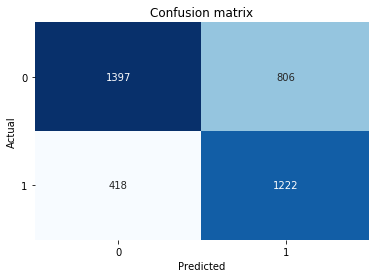

========= Eperiment -  df_A_B+bow_char+NB  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-357
df_A_B+bow_char+RF
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      2203
           1       0.85      0.75      0.80      1640

    accuracy                           0.84      3843
   macro avg       0.84      0.83      0.83      3843
weighted avg       0.84      0.84      0.84      3843



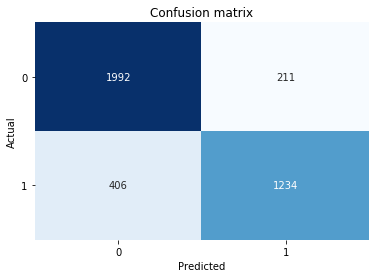

========= Eperiment -  df_A_B+bow_char+RF  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-358
 ====  bow_char  ==== 


Accuracy  F1-score    Recall  Precision       AUC
LR          0.836326  0.798203  0.758537   0.842248  0.826386
SVM_linear  0.812126  0.773951  0.753659   0.795367  0.804655
SVM_rbf     0.815509  0.745969  0.634756   0.904431  0.792412
NB          0.681499  0.666303  0.745122   0.602564  0.689629
RF          0.839448  0.800000  0.752439   0.853979  0.828330

df_A_B+tfidf_word+LR
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      2203
           1       0.87      0.70      0.78      1640

    accuracy                           0.83      3843
   macro avg       0.84      0.81      0.82      3843
weighted avg       0.83      0.83      0.82      3843



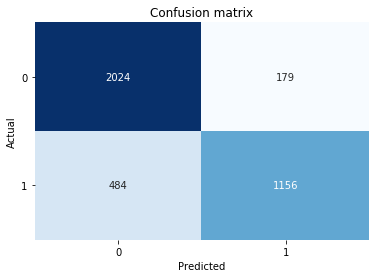

========= Eperiment -  df_A_B+tfidf_word+LR  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-359
df_A_B+tfidf_word+SVM_linear
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      2203
           1       0.83      0.74      0.78      1640

    accuracy                           0.82      3843
   macro avg       0.82      0.81      0.82      3843
weighted avg       0.82      0.82      0.82      3843



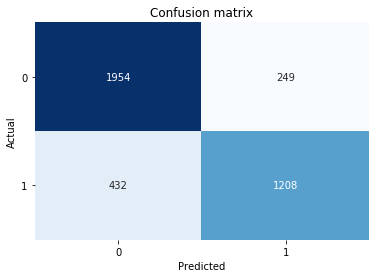

========= Eperiment -  df_A_B+tfidf_word+SVM_linear  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-360
df_A_B+tfidf_word+SVM_rbf
              precision    recall  f1-score   support

           0       0.81      0.93      0.86      2203
           1       0.88      0.70      0.78      1640

    accuracy                           0.83      3843
   macro avg       0.84      0.82      0.82      3843
weighted avg       0.84      0.83      0.83      3843



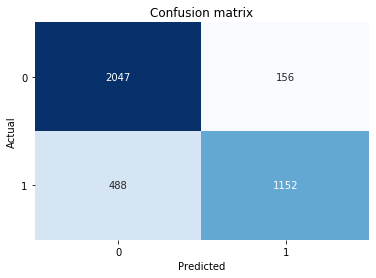

========= Eperiment -  df_A_B+tfidf_word+SVM_rbf  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-361
df_A_B+tfidf_word+NB
              precision    recall  f1-score   support

           0       0.79      0.53      0.63      2203
           1       0.56      0.81      0.66      1640

    accuracy                           0.65      3843
   macro avg       0.67      0.67      0.65      3843
weighted avg       0.69      0.65      0.64      3843



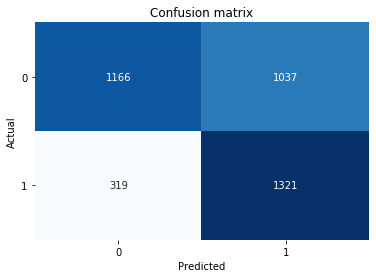

========= Eperiment -  df_A_B+tfidf_word+NB  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-362
df_A_B+tfidf_word+RF
              precision    recall  f1-score   support

           0       0.81      0.90      0.86      2203
           1       0.85      0.72      0.78      1640

    accuracy                           0.83      3843
   macro avg       0.83      0.81      0.82      3843
weighted avg       0.83      0.83      0.82      3843



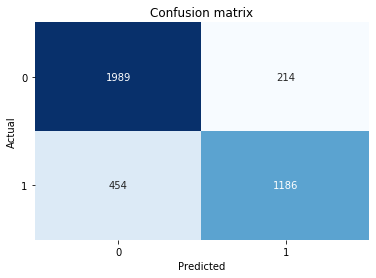

========= Eperiment -  df_A_B+tfidf_word+RF  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-363
 ====  tfidf_word  ==== 


Accuracy  F1-score    Recall  Precision       AUC
LR          0.827479  0.777143  0.704878   0.865918  0.811813
SVM_linear  0.822795  0.780110  0.736585   0.829101  0.811779
SVM_rbf     0.832423  0.781547  0.702439   0.880734  0.815813
NB          0.647151  0.660830  0.805488   0.560221  0.667383
RF          0.826177  0.780263  0.723171   0.847143  0.813015

df_A_B+tfidf_char+LR
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2203
           1       0.88      0.70      0.78      1640

    accuracy                           0.83      3843
   macro avg       0.85      0.82      0.82      3843
weighted avg       0.84      0.83      0.83      3843



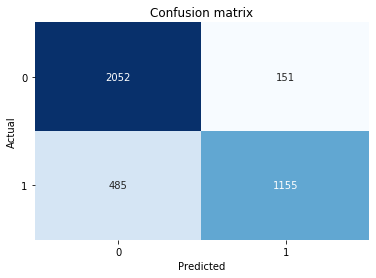

========= Eperiment -  df_A_B+tfidf_char+LR  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-364
df_A_B+tfidf_char+SVM_linear
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      2203
           1       0.87      0.76      0.81      1640

    accuracy                           0.85      3843
   macro avg       0.85      0.84      0.84      3843
weighted avg       0.85      0.85      0.85      3843



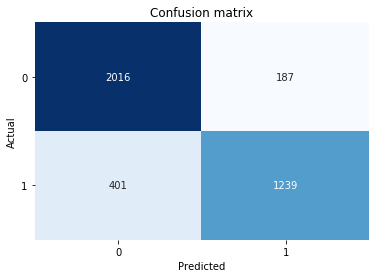

========= Eperiment -  df_A_B+tfidf_char+SVM_linear  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-365
df_A_B+tfidf_char+SVM_rbf
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      2203
           1       0.90      0.71      0.79      1640

    accuracy                           0.84      3843
   macro avg       0.85      0.82      0.83      3843
weighted avg       0.85      0.84      0.84      3843



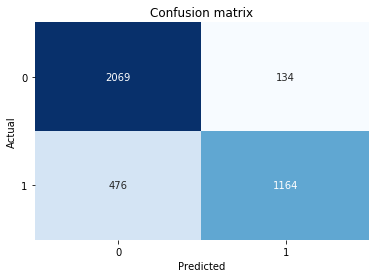

========= Eperiment -  df_A_B+tfidf_char+SVM_rbf  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-366
df_A_B+tfidf_char+NB
              precision    recall  f1-score   support

           0       0.75      0.67      0.71      2203
           1       0.61      0.70      0.65      1640

    accuracy                           0.68      3843
   macro avg       0.68      0.68      0.68      3843
weighted avg       0.69      0.68      0.68      3843



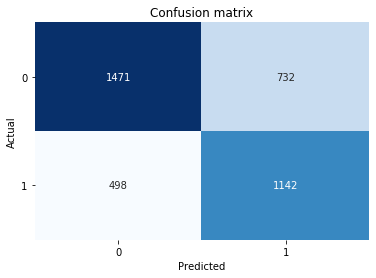

========= Eperiment -  df_A_B+tfidf_char+NB  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-367
df_A_B+tfidf_char+RF
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      2203
           1       0.85      0.75      0.80      1640

    accuracy                           0.84      3843
   macro avg       0.84      0.82      0.83      3843
weighted avg       0.84      0.84      0.83      3843



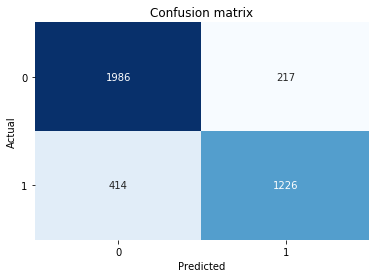

========= Eperiment -  df_A_B+tfidf_char+RF  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-368
 ====  tfidf_char  ==== 


Accuracy  F1-score    Recall  Precision       AUC
LR          0.834504  0.784114  0.704268   0.884380  0.817863
SVM_linear  0.846995  0.808219  0.755488   0.868864  0.835302
SVM_rbf     0.841270  0.792376  0.709756   0.896764  0.824465
NB          0.679938  0.649972  0.696341   0.609392  0.682034
RF          0.835805  0.795329  0.747561   0.849619  0.824529

 ====  df_A_B  ==== 


Accuracy  F1-score    Recall  Precision       AUC
LR+bow_word            0.829820  0.784158  0.724390   0.854676  0.816349
SVM_linear+bow_word    0.818371  0.775851  0.736585   0.819539  0.807920
SVM_rbf+bow_word       0.817330  0.750178  0.642683   0.900855  0.795014
NB+bow_word            0.644288  0.670999  0.850000   0.554274  0.670574
RF+bow_word            0.826698  0.780343  0.721341   0.849856  0.813235
LR+bow_char            0.836326  0.798203  0.758537   0.842248  0.826386
SVM_linear+bow_char    0.812126  0.773951  0.753659   0.795367  0.804655
SVM_rbf+bow_char       0.815509  0.745969  0.634756   0.904431  0.792412
NB+bow_char            0.681499  0.666303  0.745122   0.602564  0.689629
RF+bow_char            0.839448  0.800000  0.752439   0.853979  0.828330
LR+tfidf_word          0.827479  0.777143  0.704878   0.865918  0.811813
SVM_linear+tfidf_word  0.822795  0.780110  0.736585   0.829101  0.811779
SVM_rbf+tfidf_word     0.832423  0.781547  0.702439   0.880734  0.815813
NB+tfidf_word          0.647151  0.660830  0.805488   0.560221  0.667383
RF+tfidf_word          0.826177  0.780263  0.723171   0.847143  0.813015
LR+tfidf_char          0.834504  0.784114  0.704268   0.884380  0.817863
SVM_linear+tfidf_char  0.846995  0.808219  0.755488   0.868864  0.835302
SVM_rbf+tfidf_char     0.841270  0.792376  0.709756   0.896764  0.824465
NB+tfidf_char          0.679938  0.649972  0.696341   0.609392  0.682034
RF+tfidf_char          0.835805  0.795329  0.747561   0.849619  0.824529

Accuracy  F1-score    Recall  Precision  \
df_A_B+bow_word+LR            0.829820  0.784158  0.724390   0.854676   
df_A_B+bow_word+SVM_linear    0.818371  0.775851  0.736585   0.819539   
df_A_B+bow_word+SVM_rbf       0.817330  0.750178  0.642683   0.900855   
df_A_B+bow_word+NB            0.644288  0.670999  0.850000   0.554274   
df_A_B+bow_word+RF            0.826698  0.780343  0.721341   0.849856   
df_A_B+bow_char+LR            0.836326  0.798203  0.758537   0.842248   
df_A_B+bow_char+SVM_linear    0.812126  0.773951  0.753659   0.795367   
df_A_B+bow_char+SVM_rbf       0.815509  0.745969  0.634756   0.904431   
df_A_B+bow_char+NB            0.681499  0.666303  0.745122   0.602564   
df_A_B+bow_char+RF            0.839448  0.800000  0.752439   0.853979   
df_A_B+tfidf_word+LR          0.827479  0.777143  0.704878   0.865918   
df_A_B+tfidf_word+SVM_linear  0.822795  0.780110  0.736585   0.829101   
df_A_B+tfidf_word+SVM_rbf     0.832423  0.781547  0.702439   0.880734   
df_A_B+tfidf_word+NB          0.647151  0.660830  0.805488   0.560221   
df_A_B+tfidf_word+RF          0.826177  0.780263  0.723171   0.847143   
df_A_B+tfidf_char+LR          0.834504  0.784114  0.704268   0.884380   
df_A_B+tfidf_char+SVM_linear  0.846995  0.808219  0.755488   0.868864   
df_A_B+tfidf_char+SVM_rbf     0.841270  0.792376  0.709756   0.896764   
df_A_B+tfidf_char+NB          0.679938  0.649972  0.696341   0.609392   
df_A_B+tfidf_char+RF          0.835805  0.795329  0.747561   0.849619   

                                   AUC  
df_A_B+bow_word+LR            0.816349  
df_A_B+bow_word+SVM_linear    0.807920  
df_A_B+bow_word+SVM_rbf       0.795014  
df_A_B+bow_word+NB            0.670574  
df_A_B+bow_word+RF            0.813235  
df_A_B+bow_char+LR            0.826386  
df_A_B+bow_char+SVM_linear    0.804655  
df_A_B+bow_char+SVM_rbf       0.792412  
df_A_B+bow_char+NB            0.689629  
df_A_B+bow_char+RF            0.828330  
df_A_B+tfidf_word+LR          0.811813  
df_A_B+tfidf_word+SVM_linear  0.811779  
df_A_B+tfidf_word+SVM_rbf     0.815813  
df_A_B+tfidf_word+NB          0.667383  
df_A_B+tfidf_word+RF          0.813015  
df_A_B+tfidf_char+LR          0.817863  
df_A_B+tfidf_char+SVM_linear  0.835302  
df_A_B+tfidf_char+SVM_rbf     0.824465  
df_A_B+tfidf_char+NB          0.682034  
df_A_B+tfidf_char+RF          0.824529

In [14]:
classifier_feature({'df_A_B':df_A_B},model_dict,feature_dict,'Traditional Features with ML algo Final ')

## Helper functions

In [12]:
def classifier_feature(datasets,models,features,tag):
    final_result =pd.DataFrame(columns=['Accuracy','F1-score','Recall','Precision','AUC'])
    for df_name,df in datasets.items():
        df_result =pd.DataFrame(columns=['Accuracy','F1-score','Recall','Precision','AUC'])
        X_train, X_test, Y_train, Y_test = train_test_split(
        df['cleaned'], df['label'], test_size=0.3, random_state=0, stratify=df['label'].values)
        #X_train,X_test,Y_train,Y_test = utills.prepare_dataset(df,df_name)
        for feature_name,feature in features.items():
            feature_result =pd.DataFrame(columns=['Accuracy','F1-score','Recall','Precision','AUC'])
            X_train_f,X_test_f = feature(X_train,X_test)
            for model_name,model in models.items():
                name = df_name + "+" + feature_name+ "+"+ model_name
                print(name)
                Y_pred = model(X_train_f,X_test_f,Y_train)
                accuracy, f1_score, recall, precision, auc = utills.result(Y_test,Y_pred)
                final_result.loc[name] = [accuracy, f1_score, recall, precision, auc]
                feature_result.loc[model_name] =[accuracy, f1_score, recall, precision, auc]
                key =model_name + "+"+ feature_name
                df_result.loc[key] = [accuracy, f1_score, recall, precision, auc]
                utills.log_result(Y_test,Y_pred,name,df_name,feature_name,model_name,tag)
            print(" ==== ",feature_name ," ==== ")
            display(feature_result)
            log_table(feature_name,feature_result)
        print(" ==== ",df_name ," ==== ")
        display(df_result)
        log_table(df_name,df_result)
    display(final_result)
    log_table(name,final_result)



In [11]:
# feature funtions

# bow - word
def bow_word(X_train,X_test):
    bow = CountVectorizer(analyzer="word", tokenizer=lambda text: text.split(),ngram_range=(1,2),lowercase=False)
    bow.fit(X_train)
    X_train_bow = bow.transform(X_train)
    X_test_bow = bow.transform(X_test)

    #print(bow.get_feature_names()[:20])
    #print('The shape is', bow.shape)
    # postion
    #print(bow.vocabulary_)

    return X_train_bow,X_test_bow

# bow - char
def bow_char(X_train,X_test):
    bow = CountVectorizer(analyzer="char",ngram_range=(3,4),lowercase=False)
    bow.fit(X_train)
    X_train_bow = bow.transform(X_train)
    X_test_bow = bow.transform(X_test)
    # X_train_bow = bow.fit_transform(X_train)
    # #X_train_bow = bow.transform(X_train)
    # X_test_bow = bow.transform(X_test)
    #print(bow.get_feature_names()[:20])
    #print('The shape is', tfidf.shape)
    # postion
    #print(bow.vocabulary_)

    return X_train_bow,X_test_bow

# TFIDF - word
def tfidf_word(X_train,X_test):
    tfidf = TfidfVectorizer(analyzer="word",  tokenizer=lambda text: text.split(),ngram_range=(1,2),lowercase=False)
    X_train_tfidf = tfidf.fit_transform(X_train)
    #print(X_train_tfidf.shape)
    #X_train_tfidf = tfidf.transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)
    # print(tfidf.get_feature_names()[:20])
    # #print('The shape is', tfidf.shape)
    # # postion
    # print(tfidf.vocabulary_)
    return X_train_tfidf,X_test_tfidf

# TFIDF - char
def tfidf_char(X_train,X_test):
    tfidf = TfidfVectorizer(analyzer="char",ngram_range=(3,4),lowercase=False)
    X_train_tfidf  = tfidf.fit_transform(X_train)
    #X_train_tfidf = tfidf.transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)

    # print(tfidf.get_feature_names()[:20])
    # #print('The shape is', tfidf.shape)
    # # postion
    # print(tfidf.vocabulary_)
    
    return X_train_tfidf,X_test_tfidf

# word2vec




# fasttext

In [ ]:

def dataset_check(df_list,vectorizer,feature_name,model,model_name):
    
    final_result =pd.DataFrame(columns=['Accuracy','F1-score','Recall','Precision','AUC'])
    for name,df in df_list.items():
        X_train,X_test,Y_train,Y_test = utills.prepare_dataset(df,name)
        model_pipe, Y_pred = model(X_train,X_test,Y_train,vectorizer,feature_name)
        # gridsearch function and get best parameter for dataset
        gridsearch(model_pipe,param_grid,X_train,Y_train)
        final_result = log_result(Y_test,Y_pred,feature_name,name,final_result,model_name)
         
    
    return final_result
      


In [104]:
def result(y_test, y_pred):
    import sklearn.metrics as metrics
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np

    classes = np.unique(y_test)
    #y_test_array = pd.get_dummies(y_test, drop_first=False).values
    ## Accuracy, Precision, Recall
    accuracy = metrics.accuracy_score(y_test, y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)

    #print(metrics.classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, cbar=False)
    ax.set(xlabel="Predicted", ylabel="Actual", xticklabels=classes,
           yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)
    plt.show()
#     utills.PlotRocAuc(y_test, y_pred, 'green', 'LR')
  
    return (accuracy, f1_score, recall, precision, auc)

In [ ]:
# Loading pretrained FastText word embeddings in Sinhala
import fasttext
import fasttext.util
ft = fasttext.load_model('/content/cc.si.300.bin')
ft.get_dimension()
# Mapping FastText word vectors with word in the dataset 
embeddings_matrix = np.zeros((vocab_size+1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = ft.get_word_vector(word)
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector